<a href="https://colab.research.google.com/github/Jay2310x/CodSoft_Task2/blob/main/Sales_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

#import warnings
#warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [20]:
df = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')

# Check the first few rows of the dataset
print(df.head())

     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773      

In [21]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

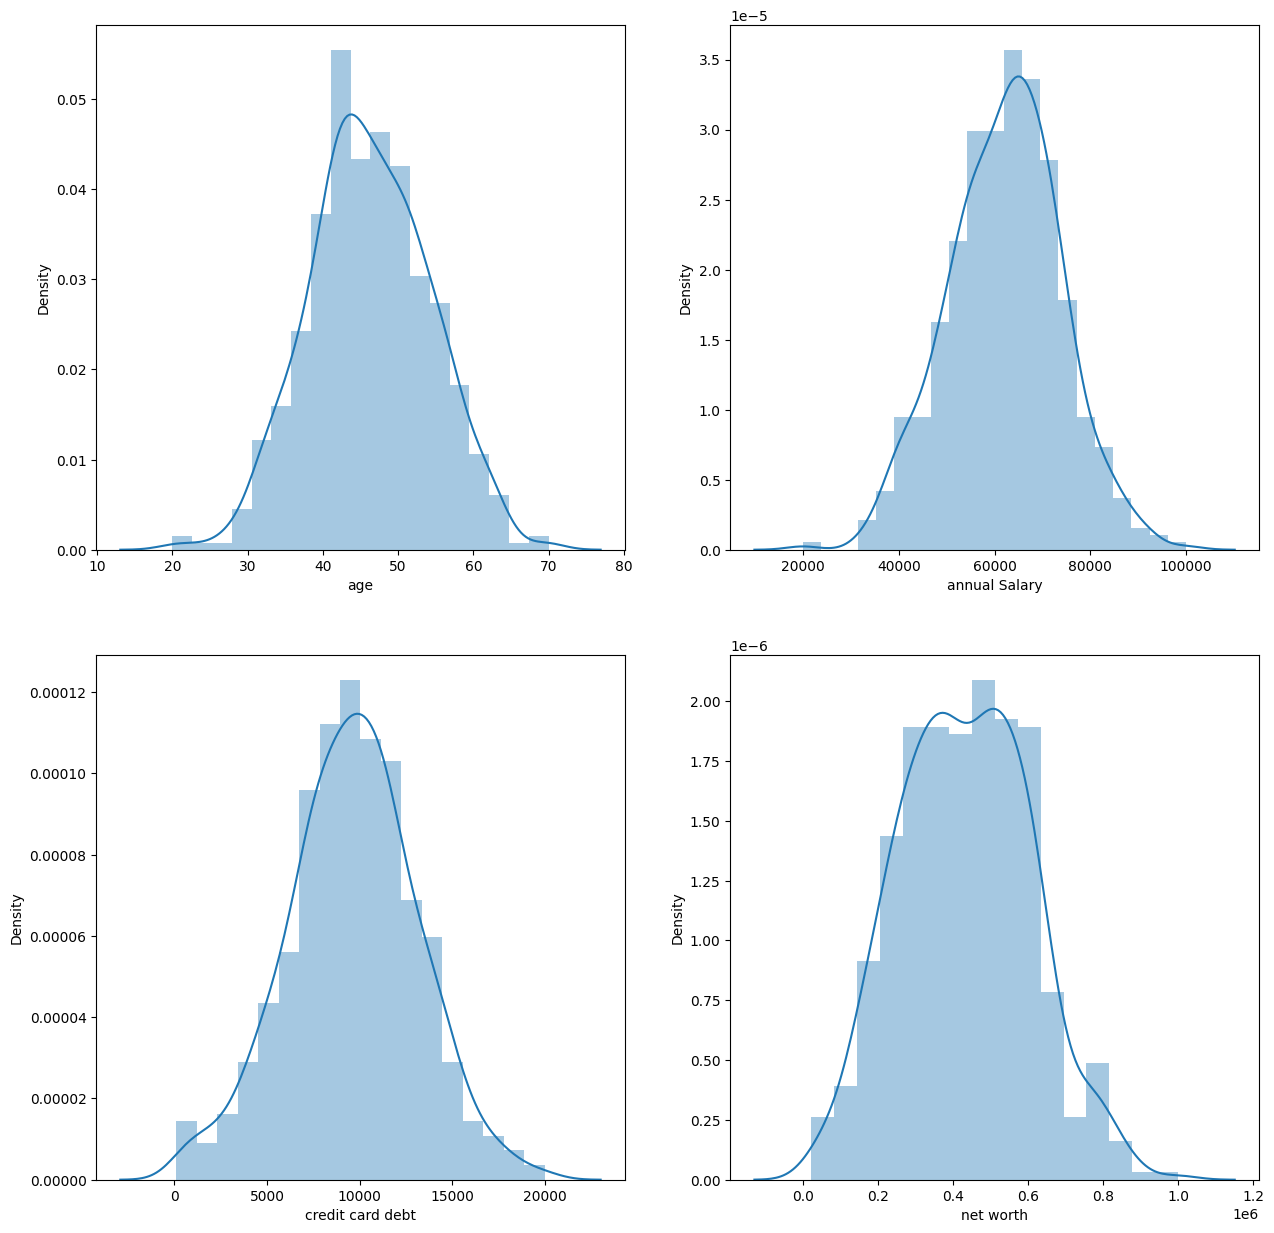

In [22]:
num_cols=['age','annual Salary','credit card debt','net worth']
plt.figure(figsize=(15,15))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]])

In [23]:
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

In [24]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 4)
(400, 1)
(100, 4)
(100, 1)


In [26]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 21ms/step - loss: 1.0423 - mean_absolute_error: 0.9927 - val_loss: 0.9267 - val_mean_absolute_error: 0.9313
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.7351 - mean_absolute_error: 0.8297 - val_loss: 0.6576 - val_mean_absolute_error: 0.7797
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.5155 - mean_absolute_error: 0.6888 - val_loss: 0.4638 - val_mean_absolute_error: 0.6501
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.3598 - mean_absolute_error: 0.5714 - val_loss: 0.3344 - val_mean_absolute_error: 0.5484
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2655 - mean_absolute_error: 0.4878 - val_loss: 0.2570 - val_mean_absolute_error: 0.4777
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2093 - mean_absolute_error: 0.4299 - val_loss: 0.2077 - val_mean_absolute_error: 0.4257
Epoch 7/50
10/10 [=========

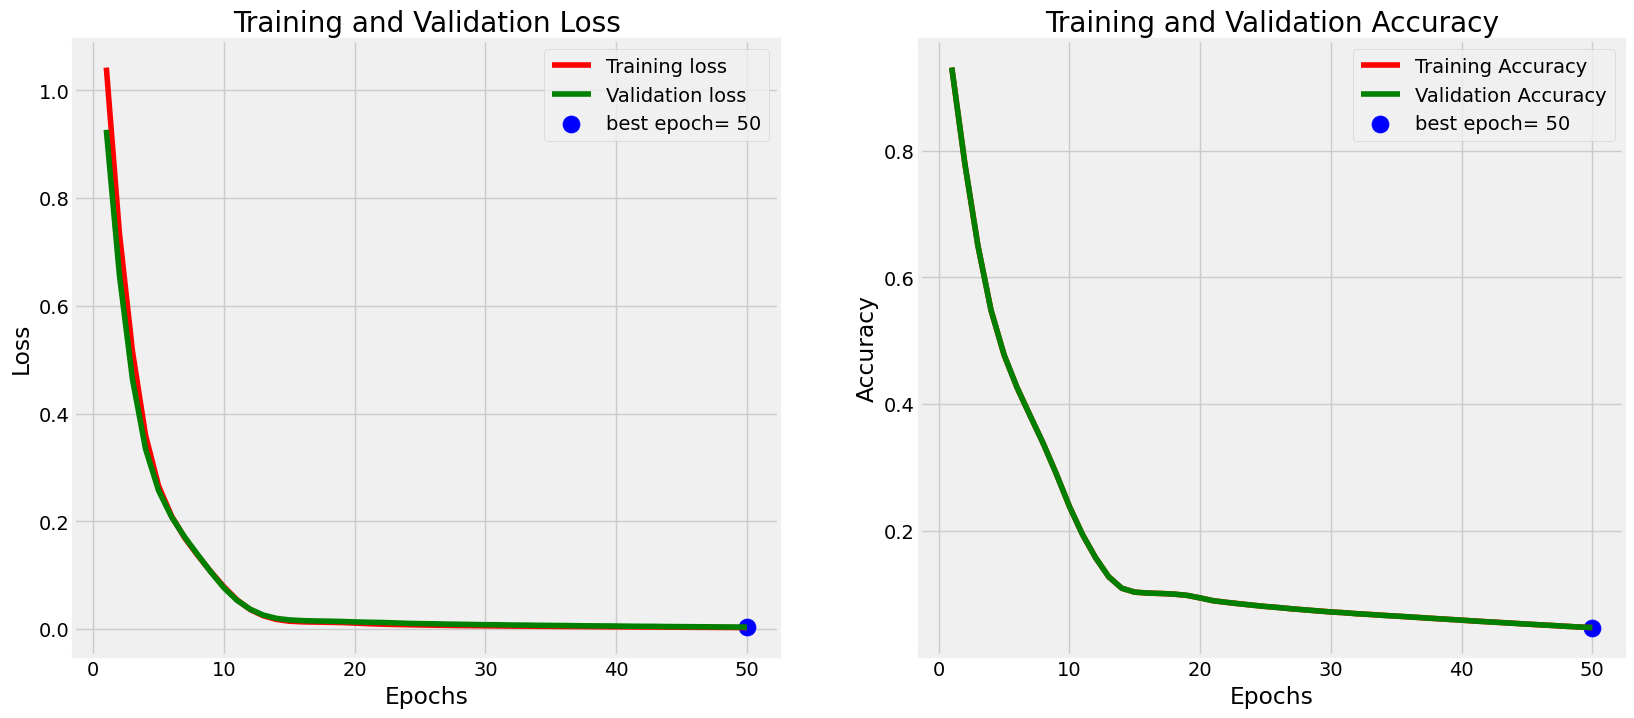

In [29]:
tr_acc = history.history['val_mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [30]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [31]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.8728160825846073
